Missing Values:
NDVI    2190
CI      2190
dtype: int64


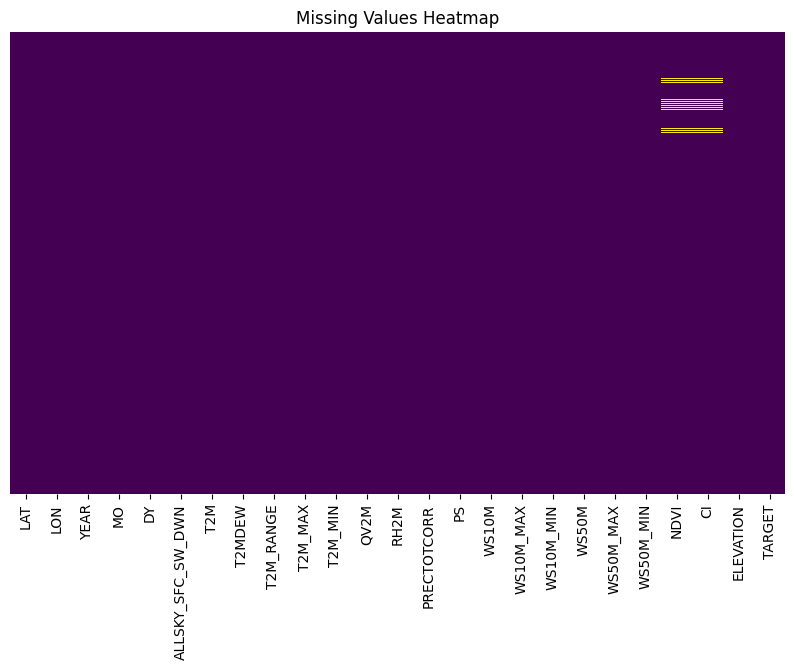

Model saved as 'hornbill_breeding_model.pkl'
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95     12054
        True       0.93      0.87      0.90      5914

    accuracy                           0.93     17968
   macro avg       0.93      0.92      0.92     17968
weighted avg       0.93      0.93      0.93     17968



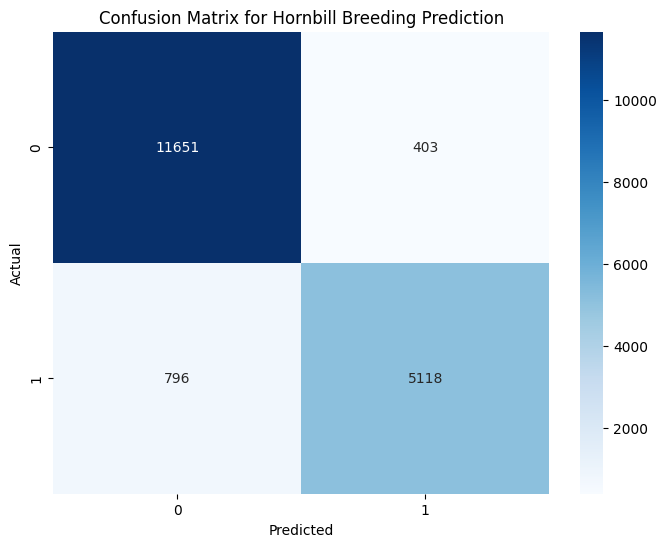

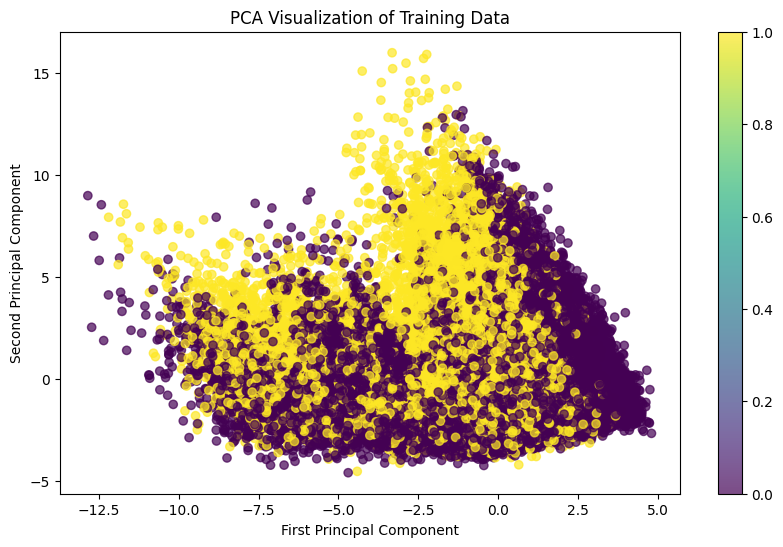

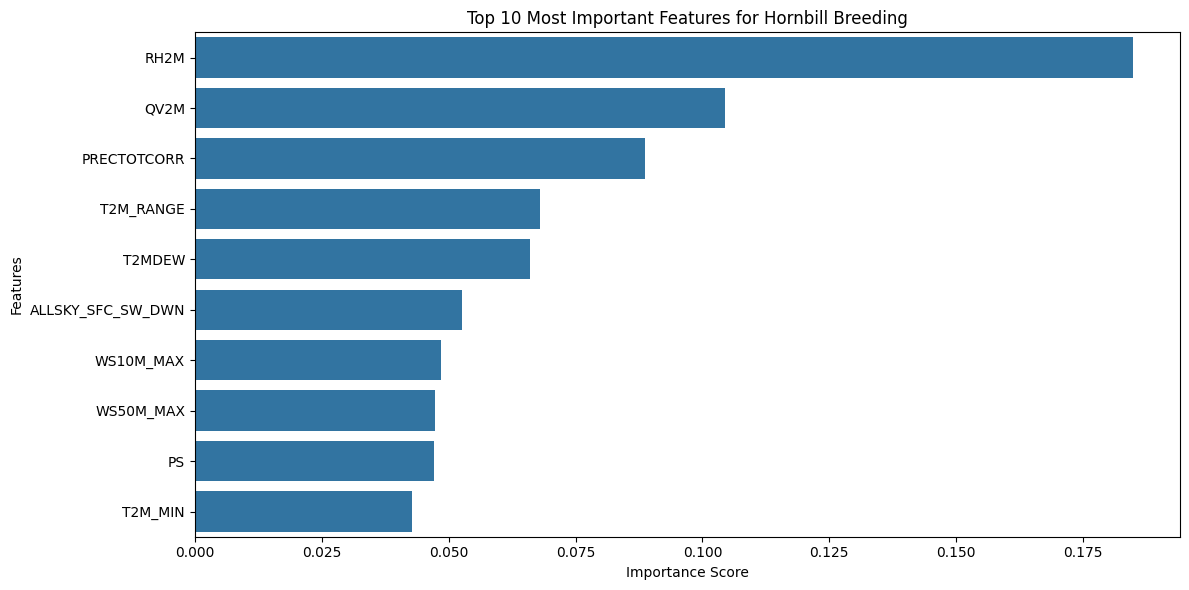

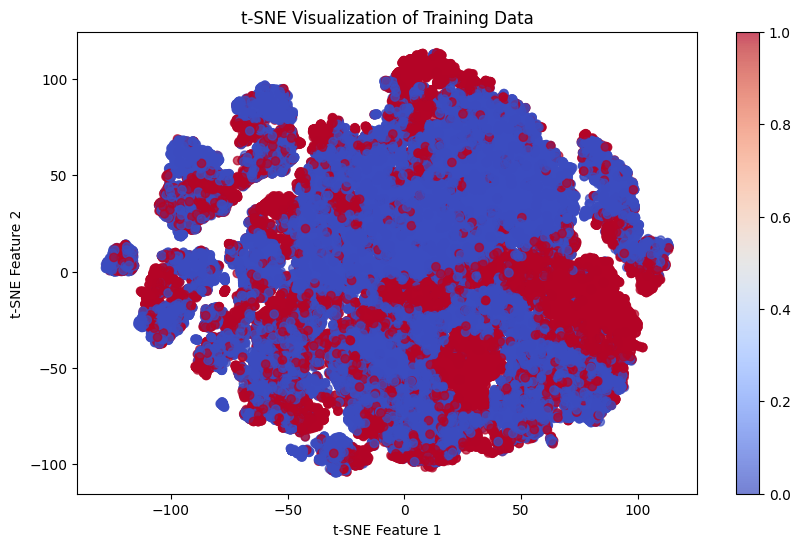

Model loaded from 'hornbill_breeding_model.pkl'
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95     12054
        True       0.93      0.87      0.90      5914

    accuracy                           0.93     17968
   macro avg       0.93      0.92      0.92     17968
weighted avg       0.93      0.93      0.93     17968



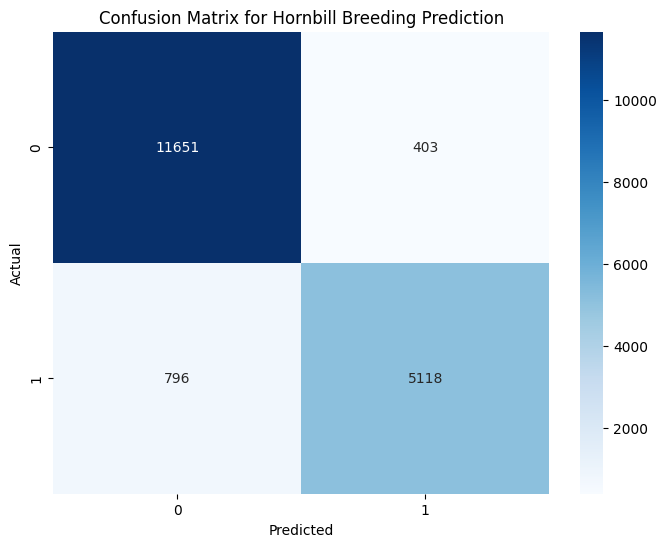

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
import joblib  # Added for saving and loading the model

class HornbillBreedingPredictor:
    def __init__(self, data_path):
        # Load the data
        self.df = pd.read_excel(data_path)
        
        # Check for missing values
        self.check_missing_values()
        
        # Prepare the data
        self.prepare_data()
    
    def check_missing_values(self):
        # Check and print missing values
        missing_values = self.df.isnull().sum()
        print("Missing Values:")
        print(missing_values[missing_values > 0])
        
        # Optional: Visualize missing values
        plt.figure(figsize=(10, 6))
        sns.heatmap(self.df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
        plt.title('Missing Values Heatmap')
        plt.show()
    
    def prepare_data(self):
        # Preprocess the data
        columns_to_drop = ['LAT', 'LON', 'YEAR', 'MO', 'DY']
        
        # Separate features and target
        self.X = self.df.drop(columns=columns_to_drop + ['TARGET'])
        self.y = self.df['TARGET']
        
        # Impute missing values
        imputer = SimpleImputer(strategy='median')
        X_imputed = imputer.fit_transform(self.X)
        
        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_imputed, self.y, test_size=0.2, random_state=42, stratify=self.y
        )
        
        # Scale the features
        self.scaler = StandardScaler()
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)
        
        # Store column names for later use
        self.feature_names = self.X.columns.tolist()
    
    def train_model(self):
        # Train Random Forest Classifier
        self.model = RandomForestClassifier(
            n_estimators=100, 
            random_state=42, 
            class_weight='balanced'
        )
        self.model.fit(self.X_train_scaled, self.y_train)
        
        # Save the trained model
        joblib.dump(self.model, 'hornbill_breeding_model.pkl')
        print("Model saved as 'hornbill_breeding_model.pkl'")
        return self
    
    def load_model(self, model_path='hornbill_breeding_model.pkl'):
        # Load the trained model
        self.model = joblib.load(model_path)
        print(f"Model loaded from '{model_path}'")
    
    def evaluate_model(self):
        # Model evaluation
        y_pred = self.model.predict(self.X_test_scaled)
        
        # Classification report
        print("Classification Report:")
        print(classification_report(self.y_test, y_pred))
        
        # Confusion Matrix
        self.plot_confusion_matrix(self.y_test, y_pred)
        
        return y_pred
    
    def plot_confusion_matrix(self, y_true, y_pred):
        # Visualize Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix for Hornbill Breeding Prediction')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()
    
    def visualize_data_distribution(self):
        # PCA Visualization with error handling
        try:
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(self.X_train_scaled)
            
            plt.figure(figsize=(10, 6))
            scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                                   c=self.y_train, 
                                   cmap='viridis', 
                                   alpha=0.7)
            plt.colorbar(scatter)
            plt.title('PCA Visualization of Training Data')
            plt.xlabel('First Principal Component')
            plt.ylabel('Second Principal Component')
            plt.show()
        except Exception as e:
            print(f"Error in PCA visualization: {e}")
    
    def feature_importance(self):
        # Feature Importance Visualization
        feature_importance = self.model.feature_importances_
        
        # Create DataFrame with feature names and importances
        importance_df = pd.DataFrame({
            'feature': self.feature_names,
            'importance': feature_importance
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y='feature', data=importance_df.head(10))
        plt.title('Top 10 Most Important Features for Hornbill Breeding')
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.tight_layout()
        plt.show()
    
    def advanced_visualization(self):
        # t-SNE Visualization
        try:
            tsne = TSNE(n_components=2, random_state=42)
            X_tsne = tsne.fit_transform(self.X_train_scaled)
            
            plt.figure(figsize=(10, 6))
            scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                                   c=self.y_train, 
                                   cmap='coolwarm', 
                                   alpha=0.7)
            plt.colorbar(scatter)
            plt.title('t-SNE Visualization of Training Data')
            plt.xlabel('t-SNE Feature 1')
            plt.ylabel('t-SNE Feature 2')
            plt.show()
        except Exception as e:
            print(f"Error in t-SNE visualization: {e}")

# Main Execution
def main():
    # Initialize the predictor
    predictor = HornbillBreedingPredictor('./data/train.xlsx')
    
    # Train the model
    predictor.train_model()
    
    # Evaluate the model
    predictor.evaluate_model()
    
    # Visualizations
    predictor.visualize_data_distribution()
    predictor.feature_importance()
    predictor.advanced_visualization()

    # Load the saved model for reuse
    predictor.load_model()
    predictor.evaluate_model()

# Run the script
if __name__ == '__main__':
    main()


In [19]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

class HornbillBreedingTester:
    def __init__(self, model_path, scaler_path=None):
        # Load the trained model
        self.model = joblib.load(model_path)
        print(f"Model loaded from '{model_path}'")
        
        # Load the scaler if provided, otherwise initialize a new one
        if scaler_path:
            self.scaler = joblib.load(scaler_path)
            print(f"Scaler loaded from '{scaler_path}'")
        else:
            self.scaler = StandardScaler()

    def preprocess_new_data(self, new_data_path):
        # Load new data
        new_data = pd.read_excel(new_data_path)
        
        # Drop unnecessary columns (ensure this matches training data preprocessing)
        columns_to_drop = ['LAT', 'LON', 'YEAR', 'MO', 'DY', 'TARGET']
        new_data = new_data.drop(columns=columns_to_drop, errors='ignore')
        
        # Handle missing values
        imputer = SimpleImputer(strategy='median')
        X_new = imputer.fit_transform(new_data)
        
        # Scale the features
        X_new_scaled = self.scaler.fit_transform(X_new)
        return X_new_scaled, new_data

    def classify(self, new_data_path):
        # Preprocess new data
        X_new_scaled, new_data = self.preprocess_new_data(new_data_path)
        
        # Predict classes
        predictions = self.model.predict(X_new_scaled)
        
        # Add predictions to the original dataframe
        new_data['PREDICTION'] = predictions
        return new_data

    def save_predictions(self, new_data, output_path):
        # Save the dataframe with predictions to a new Excel file
        new_data.to_excel(output_path, index=False)
        print(f"Predictions saved to '{output_path}'")

# Main Execution for Testing New Data
def test_new_data():
    model_path = 'hornbill_breeding_model.pkl'
    new_data_path = './data/train.xlsx'  # Path to new data file
    output_path = './data/predictions.xlsx'  # Path to save predictions

    # Initialize the tester
    tester = HornbillBreedingTester(model_path)
    
    # Classify new data and get the dataframe with predictions
    new_data_with_predictions = tester.classify(new_data_path)
    
    # Save predictions to a new Excel file
    tester.save_predictions(new_data_with_predictions, output_path)

# Run the testing script
if __name__ == '__main__':
    test_new_data()


Model loaded from 'hornbill_breeding_model.pkl'
Predictions saved to './data/predictions.xlsx'


In [2]:
import pandas as pd

new_places_data = pd.read_excel("./data/train.xlsx")

new_places_data.dropna()

new_places_data.to_excel("./data/train.xlsx")

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import pickle
import matplotlib.pyplot as plt
from datetime import datetime


def create_comprehensive_autoencoder(input_dim):
    """
    Create a comprehensive autoencoder to handle multiple features.
    
    Parameters:
        input_dim (int): Number of input features.
    
    Returns:
        tf.keras.Model: Compiled autoencoder model.
    """
    input_layer = tf.keras.layers.Input(shape=(input_dim,))
    
    # Encoder
    encoded = tf.keras.layers.Dense(max(input_dim, 64), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_layer)
    encoded = tf.keras.layers.BatchNormalization()(encoded)
    encoded = tf.keras.layers.Dense(max(input_dim // 2, 32), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(encoded)
    encoded = tf.keras.layers.BatchNormalization()(encoded)
    bottleneck = tf.keras.layers.Dense(max(input_dim // 4, 16), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(encoded)
    
    # Decoder
    decoded = tf.keras.layers.Dense(max(input_dim // 2, 32), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(bottleneck)
    decoded = tf.keras.layers.BatchNormalization()(decoded)
    decoded = tf.keras.layers.Dense(max(input_dim, 64), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(decoded)
    decoded = tf.keras.layers.Dense(input_dim, activation='linear')(decoded)
    
    # Autoencoder
    autoencoder = tf.keras.Model(input_layer, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0), loss='mean_squared_error')
    
    return autoencoder


def plot_training_history(history, output_path):
    """
    Generate and save a plot of training and validation loss.
    
    Parameters:
        history (dict): Model training history.
        output_path (str): Path to save the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Autoencoder Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()


def iqr_outlier_removal_custom(data, column_multipliers):
    """
    Remove outliers using feature-specific IQR multipliers.

    Parameters:
    - data: DataFrame to clean
    - column_multipliers: Dictionary with column names as keys and multipliers as values.

    Returns:
    - Cleaned DataFrame
    """
    cleaned_data = data.copy()

    for column, multiplier in column_multipliers.items():
        # Calculate Q1, Q3, and IQR
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Remove outliers
        initial_rows = len(cleaned_data)
        cleaned_data = cleaned_data[
            (cleaned_data[column] >= lower_bound) & 
            (cleaned_data[column] <= upper_bound)
        ]
        removed_rows = initial_rows - len(cleaned_data)

        print(f"\nOutlier Cleaning for {column}:")
        print(f"  Q1: {Q1:.4f}")
        print(f"  Q3: {Q3:.4f}")
        print(f"  IQR: {IQR:.4f}")
        print(f"  Lower Bound: {lower_bound:.4f}")
        print(f"  Upper Bound: {upper_bound:.4f}")
        print(f"  Removed Rows: {removed_rows}")

    return cleaned_data


def advanced_data_preprocessing(data):
    """
    Comprehensive data preprocessing pipeline.
    
    Parameters:
        data (pd.DataFrame): Original DataFrame.
    
    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """
    relevant_columns = [
        'MO', 'ALLSKY_SFC_SW_DWN', 'T2M', 'T2MDEW', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN',
        'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
        'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'NDVI', 'CI', 'ELEVATION'
    ]
    cleaned_data = data[relevant_columns].apply(pd.to_numeric, errors='coerce').dropna()
    # Define custom multipliers for features
    multipliers = {
        "MO": 1.0,
        "ALLSKY_SFC_SW_DWN": 1.0,
        "T2M": 1.0,
        "PRECTOTCORR": 2.5,
        "WS10M_MIN": 3.0,
        "NDVI": 3.0,
        "CI": 2.0,
        "ELEVATION": 1.0,
    }

    cleaned_data = iqr_outlier_removal_custom(data, multipliers)

    return cleaned_data


def train_comprehensive_anomaly_model(data):
    """
    Train a comprehensive anomaly detection model using autoencoders.
    
    Parameters:
        data (pd.DataFrame): Full dataset.
    
    Returns:
        dict: Dictionary containing model, scaler, and training history.
    """
    output_dir = "outputs"
    model_dir = os.path.join(output_dir, "models")
    plot_dir = os.path.join(output_dir, "plots")
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(plot_dir, exist_ok=True)
    
    feature_data = advanced_data_preprocessing(data)
    if len(feature_data) < 500:
        print("Insufficient data for model training.")
        return None
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(feature_data.values)
    X_train, X_test = train_test_split(X_scaled, test_size=0.1, random_state=42)
    
    input_dim = X_scaled.shape[1]
    autoencoder = create_comprehensive_autoencoder(input_dim)
    
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)
    ]
    
    history = autoencoder.fit(
        X_train, X_train,
        epochs=250,
        batch_size=64,
        shuffle=True,
        validation_data=(X_test, X_test),
        callbacks=callbacks
    )
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    plot_path = os.path.join(plot_dir, f"training_loss_{timestamp}.png")
    plot_training_history(history.history, plot_path)
    
    model_path = os.path.join(model_dir, f"autoencoder_model_{timestamp}.keras")
    scaler_path = os.path.join(model_dir, f"scaler_{timestamp}.pkl")
    autoencoder.save(model_path)
    with open(scaler_path, "wb") as f:
        pickle.dump(scaler, f)
    
    print(f"Model saved to {model_path}")
    print(f"Scaler saved to {scaler_path}")
    
    return {'autoencoder': autoencoder, 'scaler': scaler, 'history': history.history}


def main():
    """
    Main function to train the anomaly detection model.
    """
    df = pd.read_excel("./data/train.xlsx").dropna()
    model_info = train_comprehensive_anomaly_model(df)
    return model_info


if __name__ == "__main__":
    main()



Outlier Cleaning for MO:
  Q1: 4.0000
  Q3: 10.0000
  IQR: 6.0000
  Lower Bound: -8.0000
  Upper Bound: 22.0000
  Removed Rows: 0

Outlier Cleaning for ALLSKY_SFC_SW_DWN:
  Q1: 3.1800
  Q3: 4.8600
  IQR: 1.6800
  Lower Bound: -0.1800
  Upper Bound: 8.2200
  Removed Rows: 0

Outlier Cleaning for T2M:
  Q1: 15.6200
  Q3: 25.5500
  IQR: 9.9300
  Lower Bound: 5.6900
  Upper Bound: 35.4800
  Removed Rows: 3673

Outlier Cleaning for PRECTOTCORR:
  Q1: 0.0000
  Q3: 7.6700
  IQR: 7.6700
  Lower Bound: -19.1750
  Upper Bound: 26.8450
  Removed Rows: 3083

Outlier Cleaning for WS10M_MIN:
  Q1: 0.3800
  Q3: 0.8200
  IQR: 0.4400
  Lower Bound: -0.9400
  Upper Bound: 2.1400
  Removed Rows: 749

Outlier Cleaning for NDVI:
  Q1: 0.4363
  Q3: 0.7812
  IQR: 0.3449
  Lower Bound: -0.5985
  Upper Bound: 1.8160
  Removed Rows: 0

Outlier Cleaning for CI:
  Q1: 0.0175
  Q3: 0.2311
  IQR: 0.2136
  Lower Bound: -0.4097
  Upper Bound: 0.6582
  Removed Rows: 31

Outlier Cleaning for ELEVATION:
  Q1: 91.0000
 

KeyboardInterrupt: 

In [11]:
import requests
import pandas as pd

# OpenElevation API URL
URL = 'https://api.open-elevation.com/api/v1/lookup'

# Sample data (replace with your actual data)
data = {
    'LAT': [27.75, 14.35, 14.35, 14.35, 14.35],
    'LON': [92.25, 106.57, 106.57, 106.57, 106.57],
}

df = pd.DataFrame(data)

# Function to get elevation from OpenElevation API
def get_elevation(lat, lon):
    # OpenElevation allows you to send multiple coordinates in one request
    params = {
        'locations': f'{lat},{lon}',
    }
    response = requests.get(URL, params=params)
    result = response.json()
    
    # Check if the response contains the elevation data
    if result.get('results'):
        return result['results'][0]['elevation']
    else:
        return None  # Return None if no data is found

# Group the dataframe by unique LAT/LON combinations
unique_lat_lon = df[['LAT', 'LON']].drop_duplicates()

# Dictionary to store elevations for unique LAT/LON pairs
elevation_dict = {}

# Iterate over each unique LAT/LON pair and get the elevation
for _, row in unique_lat_lon.iterrows():
    lat = row['LAT']
    lon = row['LON']
    elevation = get_elevation(lat, lon)
    elevation_dict[(lat, lon)] = elevation

# Map the elevation data back to the original dataframe
df['ELEVATION'] = df.apply(lambda row: elevation_dict.get((row['LAT'], row['LON'])), axis=1)

# Display the updated dataframe
print(df)


     LAT     LON  ELEVATION
0  27.75   92.25     4988.0
1  14.35  106.57      341.0
2  14.35  106.57      341.0
3  14.35  106.57      341.0
4  14.35  106.57      341.0
